In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sm

In [27]:
df = pd.read_excel('F:\\downloads\\zomato_train.xlsx')

In [5]:
df.head(5)

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [8]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [9]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [10]:
df.dtypes.value_counts()

object    16
int64      1
dtype: int64

3.9     1687
3.8     1622
3.7     1614
3.9     1497
3.8     1476
        ... 
2.0        7
2.2        7
2.0        3
1.8        2
1.8        2
Name: rates, Length: 63, dtype: int64

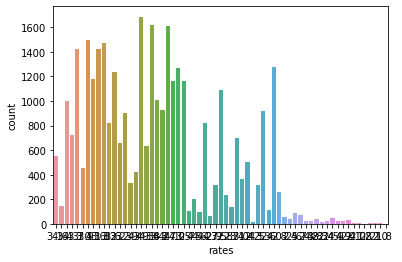

In [15]:
sns.countplot(data=df, x = 'rates', label='Count')

df['rates'].value_counts()


Text(0.5, 1.0, 'Name vs Number of Restaurant')

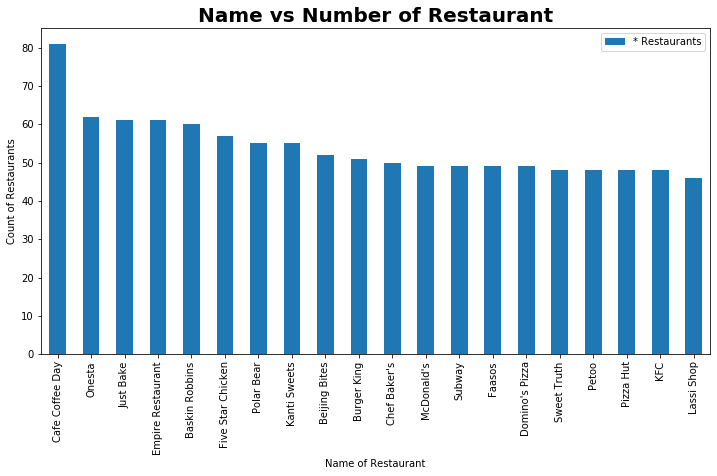

In [28]:
plt.figure(figsize = (12,6))
ax = df.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

In [29]:
df = df.drop(columns=['url','address','phone','location','reviews_list','menu_item','name'],axis=1)

In [30]:
df.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


In [31]:
df[df.duplicated(keep=False)]

,online_order,book_table,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates
10,No,No,10,Food Court,NaN,"South Indian, Beverages",400,Dine-out,Bannerghatta Road,3.6
16,Yes,No,0,Quick Bites,NaN,"North Indian, Chinese",300,Dine-out,Whitefield,NaN
105,Yes,No,0,Quick Bites,NaN,Chinese,300,Delivery,BTM,NaN
139,No,No,0,Quick Bites,NaN,Biryani,300,Dine-out,Jayanagar,NaN
204,Yes,No,6,Quick Bites,NaN,"South Indian, Biryani",300,Delivery,Church Street,3.3
...,...,...,...,...,...,...,...,...,...,...
41086,No,No,0,Quick Bites,NaN,South Indian,200,Dine-out,Whitefield,NaN
41149,No,No,0,Quick Bites,NaN,"Biryani, Kebab",150,Dine-out,Residency Road,NaN
41197,Yes,No,0,Confectionery,NaN,Desserts,200,Delivery,Rajajinagar,NaN
41255,No,No,0,Quick Bites,NaN,"North Indian, Fast Food",300,Delivery,Lavelle Road,NaN


In [32]:
df.drop_duplicates(keep=False,inplace=True)

In [33]:
df.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates
0,Yes,No,13,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,No,Yes,5015,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800",Dine-out,Koramangala 6th Block,4.6
2,No,No,6,Quick Bites,NaN,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,No,No,699,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500",Dine-out,Residency Road,4.3
4,Yes,No,129,Beverage Shop,NaN,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7


In [34]:
df.shape

(40277, 10)

In [35]:
df.replace(0,np.nan,inplace=True)

In [36]:
df.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),rates
0,Yes,No,13.0,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,No,Yes,5015.0,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800",Dine-out,Koramangala 6th Block,4.6
2,No,No,6.0,Quick Bites,NaN,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,No,No,699.0,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500",Dine-out,Residency Road,4.3
4,Yes,No,129.0,Beverage Shop,NaN,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7


In [37]:
df_new = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

In [38]:
df_new.head(20)

,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,city,rates
0,Yes,No,13.0,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,No,Yes,5015.0,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800",Dine-out,Koramangala 6th Block,4.6
2,No,No,6.0,Quick Bites,NaN,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,No,No,699.0,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500",Dine-out,Residency Road,4.3
4,Yes,No,129.0,Beverage Shop,NaN,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7
5,No,No,15.0,Bar,NaN,North Indian,"1,000",Drinks & nightlife,BTM,3.0
6,No,No,23.0,Casual Dining,NaN,"South Indian, Chinese",450,Dine-out,Residency Road,3.1
7,No,Yes,125.0,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian","2,500",Dine-out,Sarjapur Road,3.9
8,No,No,324.0,Cafe,"Burgers, Coffee, Waffles, Mocktails, Pasta, Br...","Cafe, American, Italian, Beverages",700,Delivery,Koramangala 4th Block,4.1
9,Yes,No,218.0,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600,Delivery,BTM,3.6


In [39]:
df_new.columns

Index(['online_order', 'book_table', 'votes', 'rest_type', 'dish_liked',
       'cuisines', 'cost', 'type', 'city', 'rates'],
      dtype='object')

In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40277 entries, 0 to 41372
Data columns (total 10 columns):
online_order    40277 non-null object
book_table      40277 non-null object
votes           33229 non-null float64
rest_type       40104 non-null object
dish_liked      18847 non-null object
cuisines        40247 non-null object
cost            40002 non-null object
type            40277 non-null object
city            40277 non-null object
rates           33266 non-null object
dtypes: float64(1), object(9)
memory usage: 2.0+ MB


In [41]:
df_new.isna().sum()

online_order        0
book_table          0
votes            7048
rest_type         173
dish_liked      21430
cuisines           30
cost              275
type                0
city                0
rates            7011
dtype: int64

In [42]:
mean_value=df_new['votes'].mean()
df_new['votes']=df_new['votes'].fillna(mean_value)

In [43]:
df_new.isna().sum()

online_order        0
book_table          0
votes               0
rest_type         173
dish_liked      21430
cuisines           30
cost              275
type                0
city                0
rates            7011
dtype: int64

In [44]:
df_new.isnull().sum()

online_order        0
book_table          0
votes               0
rest_type         173
dish_liked      21430
cuisines           30
cost              275
type                0
city                0
rates            7011
dtype: int64

In [45]:
df['dish_liked'].unique()

array([nan,
       'Cocktails, Craft Beer, Salads, Devils Chicken, Sea Food, Mocktails, Wedges',
       'Noodles, Laksa, Cocktails, Dumplings, Sangria, Momos, Sushi', ...,
       'Dal Tadka, Matar Methi Malai, Malai Kofta, Jeera Rice, Roti',
       'Pizza, Lava Cake, Chocolava Cake',
       'Butter Chicken, Dal Makhani, Malai Kofta'], dtype=object)

In [46]:
df['rest_type'].unique()

array(['Quick Bites', 'Casual Dining, Pub', 'Casual Dining',
       'Beverage Shop', 'Bar', 'Lounge', 'Cafe', 'Dessert Parlor',
       'Dessert Parlor, Quick Bites', 'Takeaway, Delivery', 'Food Court',
       'Pub, Casual Dining', nan, 'Dessert Parlor, Bakery', 'Fine Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Cafe',
       'Bakery, Quick Bites', 'Delivery', 'Cafe, Casual Dining',
       'Beverage Shop, Quick Bites', 'Bar, Casual Dining', 'Bakery, Cafe',
       'Bakery', 'Pub', 'Casual Dining, Cafe', 'Bakery, Dessert Parlor',
       'Sweet Shop', 'Pub, Bar', 'Quick Bites, Beverage Shop',
       'Lounge, Casual Dining', 'Food Truck', 'Cafe, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Microbrewery, Casual Dining',
       'Cafe, Dessert Parlor', 'Fine Dining, Bar', 'Bhojanalya',
       'Cafe, Bakery', 'Dhaba', 'Lounge, Microbrewery', 'Takeaway',
       'Bar, Lounge', 'Kiosk', 'Quick Bites, Cafe',
       'Casual Dining, Irani Cafee', 'Sweet Shop, Quick Bites',
       

In [47]:
df['rates'].unique()

array(['3.1 ', '4.6 ', '3.4 ', '4.3 ', '3.7 ', '3.0', '3.9 ', '4.1',
       '3.6', '3.8 ', '3.2', '3.6 ', '3.2 ', '3.3 ', '2.9', nan, '4.4',
       '3.9', '4.3', '3.8', '3.4', '4.2 ', '3.7', '4.1 ', '4.0 ', '3.5',
       '2.7 ', '4.5', '4.6', '4.2', '4.7', '2.9 ', '3.5 ', '2.8 ', '2.7',
       '3.1', '3.0 ', '4.4 ', '2.2', '4.5 ', '2.6', '4.0', '2.8', '3.3',
       '-', '2.5', '2.6 ', '4.7 ', '2.3', '4.8', '4.8 ', '2.3 ', '2.4 ',
       '2.5 ', '4.9 ', '4.9', '2.4', '2.1', '2.0 ', '1.8', '2.2 ', '2.1 ',
       '2.0', '1.8 '], dtype=object)

In [48]:
df_new.head()


,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,city,rates
0,Yes,No,13.0,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,Delivery,Residency Road,3.1
1,No,Yes,5015.0,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800",Dine-out,Koramangala 6th Block,4.6
2,No,No,6.0,Quick Bites,NaN,Kerala,250,Dine-out,Koramangala 4th Block,3.4
3,No,No,699.0,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500",Dine-out,Residency Road,4.3
4,Yes,No,129.0,Beverage Shop,NaN,"Juices, Fast Food",150,Delivery,Koramangala 6th Block,3.7


In [49]:
df_new = df_new.loc[df_new.rates !='NEW']
df_new = df_new.loc[df_new.rates !='-'].reset_index(drop=True)

In [50]:
#df_new['rates'] = df_new['rates'].apply(lambda x: str(x).split('/')[0])
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df_new.rates = df_new.rates.apply(remove_slash).str.strip().astype('float')

In [51]:
df_new['rates'].head()

0    3.1
1    4.6
2    3.4
3    4.3
4    3.7
Name: rates, dtype: float64

In [52]:
df_new.isna().sum()

online_order        0
book_table          0
votes               0
rest_type         173
dish_liked      21376
cuisines           30
cost              271
type                0
city                0
rates            7011
dtype: int64

In [53]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40223 entries, 0 to 40222
Data columns (total 10 columns):
online_order    40223 non-null object
book_table      40223 non-null object
votes           40223 non-null float64
rest_type       40050 non-null object
dish_liked      18847 non-null object
cuisines        40193 non-null object
cost            39952 non-null object
type            40223 non-null object
city            40223 non-null object
rates           33212 non-null float64
dtypes: float64(2), object(8)
memory usage: 1.8+ MB


In [54]:
df_new.dropna(how='any',inplace=True)

In [55]:
df_new.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,city,rates
1,No,Yes,5015.0,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800",Dine-out,Koramangala 6th Block,4.6
3,No,No,699.0,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500",Dine-out,Residency Road,4.3
7,No,Yes,125.0,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian","2,500",Dine-out,Sarjapur Road,3.9
8,No,No,324.0,Cafe,"Burgers, Coffee, Waffles, Mocktails, Pasta, Br...","Cafe, American, Italian, Beverages",700,Delivery,Koramangala 4th Block,4.1
9,Yes,No,218.0,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600,Delivery,BTM,3.6


In [56]:
df_new.shape

(18540, 10)

In [57]:
#Some Transformations
df_new['cost'] = df_new['cost'].astype(str)
df_new['cost'] = df_new['cost'].apply(lambda x: x.replace(',','.'))
df_new['cost'] = df_new['cost'].astype(float)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18540 entries, 1 to 40218
Data columns (total 10 columns):
online_order    18540 non-null object
book_table      18540 non-null object
votes           18540 non-null float64
rest_type       18540 non-null object
dish_liked      18540 non-null object
cuisines        18540 non-null object
cost            18540 non-null float64
type            18540 non-null object
city            18540 non-null object
rates           18540 non-null float64
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18540 entries, 1 to 40218
Data columns (total 10 columns):
online_order    18540 non-null object
book_table      18540 non-null object
votes           18540 non-null float64
rest_type       18540 non-null object
dish_liked      18540 non-null object
cuisines        18540 non-null object
cost            18540 non-null float64
type            18540 non-null object
city            18540 non-null object
rates           18540 non-null float64
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [59]:
from sklearn.preprocessing import LabelEncoder

lr=LabelEncoder()

for i in df_new.select_dtypes("object").columns:
    df_new[i]=lr.fit_transform(df_new[i])

In [60]:
df_new

,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,city,rates
1,0,1,5015.0,26,1412,788,1.8,4,18,4.6
3,0,0,699.0,20,3083,1628,1.5,4,27,4.3
7,0,1,125.0,46,1564,791,2.5,4,28,3.9
8,0,0,324.0,13,514,334,700.0,2,16,4.1
9,1,0,218.0,20,345,278,600.0,2,0,3.6
...,...,...,...,...,...,...,...,...,...,...
40200,1,0,163.0,29,887,1134,400.0,2,23,3.7
40207,1,0,25.0,62,3394,1174,500.0,4,6,3.7
40209,1,0,175.0,20,993,258,750.0,4,7,4.0
40210,1,0,150.0,20,4558,1164,650.0,2,28,3.9


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [62]:
X = df_new.drop(['rates'],1)
y = df_new['rates']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [66]:
df_new.head()

,online_order,book_table,votes,rest_type,dish_liked,cuisines,cost,type,city,rates
1,0,1,5015.0,26,1412,788,1.8,4,18,4.6
3,0,0,699.0,20,3083,1628,1.5,4,27,4.3
7,0,1,125.0,46,1564,791,2.5,4,28,3.9
8,0,0,324.0,13,514,334,700.0,2,16,4.1
9,1,0,218.0,20,345,278,600.0,2,0,3.6


In [67]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.20259758975400477

In [71]:


from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)



c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [72]:



rfr.score(X_test,y_test)*100





62.34872490321655